In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
import seaborn as sns

In [10]:
player_2019_cluster = pd.read_csv('../data/2019_player_clustering.csv')

In [46]:
player_2019_cluster['MP'].min()

1003

In [6]:
interest_stats = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'USG%']

def cluster_stats(cluster):
    
    print(player_2019_cluster[interest_stats].loc[player_2019_cluster['cluster'] == cluster].mean())

In [7]:
player_2019_cluster_names = pd.read_csv('../data/clustered-nba-2019.csv')

In [13]:
player_2019_cluster_names[player_2019_cluster_names['Cluster']==4]

,Unnamed: 0,Player,Cluster,Role,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,USG%
53,53,Collin Sexton,4,???,16.7,2.9,3.0,0.5,0.1,0.430,0.402,0.839,25.2
67,67,Dennis Schroder,4,???,15.5,3.6,4.1,0.8,0.2,0.414,0.341,0.819,24.2
76,76,Emmanuel Mudiay,4,???,14.8,3.3,3.9,0.7,0.3,0.446,0.329,0.774,25.6
92,92,Dennis Smith,4,???,13.6,2.9,4.8,1.3,0.4,0.428,0.322,0.635,24.8
96,96,Cedi Osman,4,???,13.0,4.7,2.6,0.8,0.1,0.427,0.348,0.779,18.6
97,97,Gary Harris,4,???,12.9,2.8,2.2,1.0,0.3,0.424,0.339,0.799,20.0
98,98,Kevin Knox,4,???,12.8,4.5,1.1,0.6,0.3,0.370,0.343,0.717,22.3
103,103,Trevor Ariza,4,???,12.5,5.4,3.7,1.3,0.3,0.399,0.334,0.793,16.6
116,116,Kent Bazemore,4,???,11.6,3.9,2.3,1.3,0.6,0.402,0.320,0.726,22.0
118,118,Josh Jackson,4,???,11.5,4.4,2.3,0.9,0.7,0.413,0.324,0.671,23.9


In [14]:
roles = ['Skilled Bigmen','Defensive 3-pt Shooters','Floor General/Assiting Guards','6th Men/Role Players', 'Inside/Mid-range Bigmen ','Versatile Scorers', 'Star Bigmen', 'Defensive Studs', 'Traditional Big', 'Team-leading Guard', 'Pure Shooters',
         'Star Ball-Handlers/All-Stars']

cluster_dict = dict(zip(list(range(1, 13)), roles))

In [15]:
player_2019_cluster['cluster'] = player_2019_cluster['cluster'] + 1

In [16]:
player_2019_cluster['Role'] = player_2019_cluster['cluster'].map(cluster_dict)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

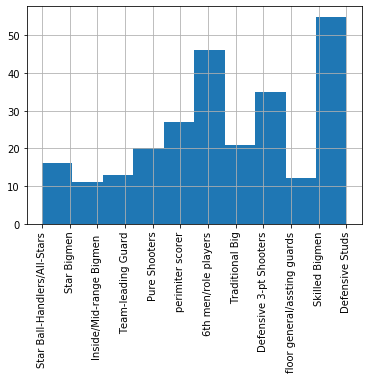

In [37]:
x = player_2019_cluster['Role'].hist()
plt.xticks(rotation='vertical')

In [18]:
role_counts = player_2019_cluster.groupby('Role').count()

In [21]:
role_count = role_counts['Player'].to_frame()

In [22]:
role_count.rename(columns={'Player': 'Count'})

,Count
Role,
6th Men/Role Players,46
Defensive 3-pt Shooters,35
Defensive Studs,32
Floor General/Assiting Guards,12
Inside/Mid-range Bigmen,11
Pure Shooters,20
Skilled Bigmen,23
Star Ball-Handlers/All-Stars,11
Star Bigmen,5


AttributeError: 'AxesSubplot' object has no attribute 'sort_values'

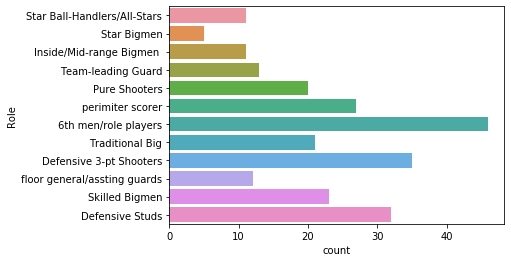

In [197]:
ax = sns.countplot(y="Role", data=player_2019_cluster)

In [250]:
x = player_2019_cluster.groupby(['Role','winning_team']).count()

In [251]:
x

Unnamed: 0  Player  Pos  Age  Tm  \
Role                         winning_team                                     
6th men/role players         0                     38      38   38   38  38   
                             1                      8       8    8    8   8   
Defensive 3-pt Shooters      0                     19      19   19   19  19   
                             1                     16      16   16   16  16   
Defensive Studs              0                     16      16   16   16  16   
                             1                     16      16   16   16  16   
Inside/Mid-range Bigmen      0                      3       3    3    3   3   
                             1                      8       8    8    8   8   
Pure Shooters                0                     10      10   10   10  10   
                             1                     10      10   10   10  10   
Skilled Bigmen               0                     14      14   14   14  14   
                             1                      9       9    9    9   9   
Star Ball-Handlers/All-Stars 0                      4       4    4    4   4   
                             1                      7       7    7    7   7   
Star Bigmen                  0                      2       2    2    2   2   
                             1                      3       3    3    3   3   
Team-leading Guard           0                      9       9    9    9   9   
                             1                      4       4    4    4   4   
Traditional Big              0                     14      14   14   14  14   
                             1                      7       7    7    7   7   
floor general/assting guards 0                      2       2    2    2   2   
                             1                     10      10   10   10  10   
perimiter scorer             0                     19      19   19   19  19   
                             1                      8       8    8    8   8   

                                            G  MP  MPG  FG  FGA  FG%  3P  3PA  \
Role                         winning_team                                       
6th men/role players         0             38  38   38  38   38   38  38   38   
                             1              8   8    8   8    8    8   8    8   
Defensive 3-pt Shooters      0             19  19   19  19   19   19  19   19   
                             1             16  16   16  16   16   16  16   16   
Defensive Studs              0             16  16   16  16   16   16  16   16   
                             1             16  16   16  16   16   16  16   16   
Inside/Mid-range Bigmen      0              3   3    3   3    3    3   3    3   
                             1              8   8    8   8    8    8   8    8   
Pure Shooters                0             10  10   10  10   10   10  10   10   
                             1             10  10   10  10   10   10  10   10   
Skilled Bigmen               0             14  14   14  14   14   14  14   14   
                             1              9   9    9   9    9    9   9    9   
Star Ball-Handlers/All-Stars 0              4   4    4   4    4    4   4    4   
                             1              7   7    7   7    7    7   7    7   
Star Bigmen                  0              2   2    2   2    2    2   2    2   
                             1              3   3    3   3    3    3   3    3   
Team-leading Guard           0              9   9    9   9    9    9   9    9   
                             1              4   4    4   4    4    4   4    4   
Traditional Big              0             14  14   14  14   14   14  14   14   
                             1              7   7    7   7    7    7   7    7   
floor general/assting guards 0              2   2    2   2    2    2   2    2   
                             1             10  10   10  10   10   10  10   10   
perimiter scorer             0             1

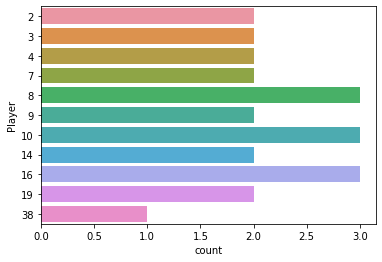

In [252]:
ax = sns.countplot(y='Player',data=x)

In [388]:
cluster_stats(3)

PTS     11.358333
TRB      4.033333
AST      5.550000
STL      1.366667
BLK      0.408333
FG%      0.447833
3P%      0.349167
FT%      0.793167
USG%    18.233333
dtype: float64


In [59]:
raptor_game_data = pd.read_csv('../data/raptor_game_data.txt')

In [60]:
raptor_game_data['Team'] = 'TOR'

In [67]:
raptor_game_data['point_diff'] = (raptor_game_data['Tm'] - raptor_game_data['Opp'])

In [68]:
raptor_game_data['point_diff'].mean() 

6.085365853658536

In [84]:
boston = pd.read_csv('../data/boston_game_data.txt')
boston['point_diff'] = (boston['Tm'] - boston['Opp'])
boston['point_diff'].mean() 

4.439024390243903

In [71]:
player_2019_cluster['tm_avg_point_diff'] = 0

In [93]:
for i in player_2019_cluster['Tm']:
    if i == 'TOR':
        player_2019_cluster['tm_avg_point_diff'] = 6.085365853658536
    if i == 'BOS':
        player_2019_cluster['tm_avg_point_diff'] = 4.4390243902439
    else: 
        player_2019_cluster['tm_avg_point_diff'] = 0

In [96]:
player_2019_cluster['Tm'].unique()

array(['HOU', 'OKC', 'MIL', 'PHI', 'LAL', 'GSW', 'PHO', 'TOR', 'NOP',
       'POR', 'WAS', 'CHO', 'DET', 'MIN', 'BOS', 'UTA', 'CHI', 'SAS',
       'DAL', 'MEM', 'BRK', 'ORL', 'SAC', 'DEN', 'TOT', 'LAC', 'ATL',
       'IND', 'CLE', 'MIA', 'NYK'], dtype=object)

In [364]:
player_2019_cluster[player_2019_cluster['Tm'] == 'TOR']

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster,Role,tm_avg_point_diff,winning_team
7,7,Kawhi Leonard,2,27,TOR,60,2040,34.0,9.3,18.8,0.496,1.9,5.0,0.371,7.5,13.8,0.542,0.546,6.1,7.1,0.854,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6,25.8,0.606,0.267,0.377,4.2,18.6,11.6,16.4,2.5,1.0,8.4,30.3,6.1,3.4,9.5,0.224,4.3,0.7,5.0,3.6,12,Star Ball-Handlers/All-Stars,0,1
49,49,Pascal Siakam,3,24,TOR,80,2548,31.9,6.5,11.8,0.549,1.0,2.7,0.369,5.5,9.1,0.602,0.591,3.0,3.8,0.785,1.6,5.3,6.9,3.1,0.9,0.7,1.9,3.0,16.9,18.7,0.628,0.226,0.320,5.4,17.5,11.6,14.6,1.4,1.7,12.5,20.8,5.7,3.6,9.3,0.175,2.0,1.4,3.4,3.5,5,Inside/Mid-range Bigmen,0,1
73,73,Serge Ibaka,3,29,TOR,74,2010,27.2,6.3,11.9,0.529,0.7,2.3,0.290,5.6,9.6,0.586,0.557,1.8,2.4,0.763,2.1,6.0,8.1,1.3,0.4,1.4,1.5,2.9,15.0,18.7,0.582,0.193,0.202,8.6,23.2,16.1,7.7,0.7,4.3,10.7,22.9,2.8,3.3,6.1,0.146,-0.7,1.2,0.5,1.3,1,Skilled Bigmen,0,1
78,78,Kyle Lowry,1,32,TOR,65,2213,34.0,4.7,11.4,0.411,2.4,7.0,0.347,2.3,4.4,0.514,0.518,2.5,3.0,0.830,0.6,4.2,4.8,8.7,1.4,0.5,2.8,2.6,14.2,16.5,0.562,0.613,0.263,2.1,12.9,7.6,34.8,2.0,1.2,18.1,19.6,3.6,3.0,6.6,0.144,2.5,0.6,3.1,2.8,3,floor general/assting guards,0,1
127,127,Fred VanVleet,1,24,TOR,64,1760,27.5,3.8,9.4,0.410,1.8,4.6,0.378,2.1,4.8,0.441,0.503,1.5,1.8,0.843,0.3,2.3,2.6,4.8,0.9,0.3,1.3,1.7,11.0,13.7,0.539,0.493,0.192,1.3,8.7,5.1,23.9,1.6,0.9,11.2,17.9,2.4,1.9,4.3,0.117,0.7,-0.7,0.0,0.9,2,Defensive 3-pt Shooters,0,1
143,143,Danny Green,1,31,TOR,80,2216,27.7,3.7,7.9,0.465,2.5,5.4,0.455,1.2,2.4,0.487,0.622,0.5,0.6,0.841,0.8,3.2,4.0,1.6,0.9,0.7,0.9,2.1,10.3,13.0,0.632,0.690,0.070,3.0,12.2,7.7,7.7,1.6,2.0,10.4,14.1,3.0,2.9,5.9,0.128,1.7,1.2,2.9,2.7,2,Defensive 3-pt Shooters,0,1
177,177,Norman Powell,1,25,TOR,60,1126,18.8,3.2,6.7,0.483,1.1,2.8,0.400,2.1,3.8,0.543,0.568,1.0,1.3,0.827,0.3,2.1,2.3,1.5,0.7,0.2,1.1,1.6,8.6,13.3,0.596,0.425,0.188,1.6,11.5,6.7,11.6,1.7,1.0,13.1,19.0,1.0,1.4,2.4,0.102,-0.4,-0.3,-0.7,0.4,2,Defensive 3-pt Shooters,0,1
213,213,OG Anunoby,2,21,TOR,67,1352,20.2,2.7,6.0,0.453,1.0,3.0,0.332,1.7,3.0,0.574,0.536,0.5,0.9,0.581,0.9,2.1,2.9,0.7,0.7,0.3,0.8,2.1,7.0,9.8,0.544,0.500,0.153,4.8,10.8,7.9,4.7,1.6,1.3,11.3,15.5,0.3,1.7,2.0,0.070,-1.3,0.1,-1.2,0.3,8,Defensive Studs,0,1


In [99]:
player_2019_cluster['Tm'].unique()

array(['HOU', 'OKC', 'MIL', 'PHI', 'LAL', 'GSW', 'PHO', 'TOR', 'NOP',
       'POR', 'WAS', 'CHO', 'DET', 'MIN', 'BOS', 'UTA', 'CHI', 'SAS',
       'DAL', 'MEM', 'BRK', 'ORL', 'SAC', 'DEN', 'TOT', 'LAC', 'ATL',
       'IND', 'CLE', 'MIA', 'NYK'], dtype=object)

Winning teams are teams that have a postivie point differental on average. 

In [100]:
winning_teams = ['MIL','TOR', 'PHI','BOS','IND','ORL','GSW','DEN','POR','HOU','UTA','OKC','SAS','LAC']

In [124]:
def winning_team(team):
    winning_teams = ['MIL','TOR', 'PHI','BOS','IND','ORL','GSW','DEN','POR','HOU','UTA','OKC','SAS','LAC']
    
    if team in winning_teams:
        return 1
    else:
        return 0

In [129]:
player_2019_cluster['winning_team'] = player_2019_cluster['Tm'].apply(winning_team)

In [127]:
test = 'MIL'

In [128]:
winning_team(test)

1

In [171]:
winning_teams = player_2019_cluster[player_2019_cluster['winning_team'] == 1]

In [176]:
winning_teams.groupby('Role').count()['Player'].sort_values(ascending=False)

Role
Defensive Studs                 16
Defensive 3-pt Shooters         16
floor general/assting guards    10
Pure Shooters                   10
Skilled Bigmen                   9
perimiter scorer                 8
Inside/Mid-range Bigmen          8
6th men/role players             8
Traditional Big                  7
Star Ball-Handlers/All-Stars     7
Team-leading Guard               4
Star Bigmen                      3
Name: Player, dtype: int64

In [ ]:
player_2019_cluster.groupby(['Role']).count()['Player']

In [144]:
player_2019_cluster['Player'].count()

256

In [238]:
player_2019_cluster[player_2019_cluster['Pos']==3]

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster,Role,tm_avg_point_diff,winning_team
2,2,Giannis Antetokounmpo,3,24,MIL,72,2358,32.8,10.0,17.3,0.578,0.7,2.8,0.256,9.3,14.5,0.641,0.599,6.9,9.5,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6,7,Star Bigmen,0,1
3,3,Joel Embiid,3,24,PHI,64,2154,33.7,9.1,18.7,0.484,1.2,4.1,0.300,7.8,14.6,0.535,0.517,8.2,10.1,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,26.1,0.593,0.219,0.541,8.1,34.0,21.4,18.4,1.0,4.4,13.2,33.3,4.9,3.8,8.7,0.194,2.0,2.1,4.1,3.3,5,Inside/Mid-range Bigmen,0,1
8,8,Kevin Durant,3,30,GSW,78,2702,34.6,9.2,17.7,0.521,1.8,5.0,0.353,7.5,12.8,0.587,0.571,5.7,6.5,0.885,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0,24.2,0.631,0.281,0.366,1.4,17.5,9.8,26.2,1.0,2.6,12.3,29.0,8.6,2.9,11.5,0.204,4.2,0.1,4.3,4.3,12,Star Ball-Handlers/All-Stars,0,1
9,9,Anthony Davis,3,25,NOP,56,1850,33.0,9.5,18.3,0.517,0.9,2.6,0.331,8.6,15.7,0.547,0.540,6.1,7.7,0.794,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9,30.3,0.597,0.141,0.422,9.9,27.5,18.8,19.0,2.2,6.0,8.4,29.5,6.4,3.1,9.5,0.247,4.7,3.9,8.5,4.9,7,Star Bigmen,0,0
13,13,Blake Griffin,3,29,DET,75,2622,35.0,8.3,17.9,0.462,2.5,7.0,0.362,5.7,10.9,0.525,0.532,5.5,7.3,0.753,1.3,6.2,7.5,5.4,0.7,0.4,3.4,2.7,24.5,21.0,0.581,0.389,0.410,4.0,20.1,11.8,27.1,1.0,0.9,13.8,30.2,5.1,2.9,8.0,0.147,4.2,0.4,4.6,4.4,12,Star Ball-Handlers/All-Stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,Mike Scott,3,30,TOT,79,1395,17.7,2.1,5.3,0.400,1.3,3.2,0.401,0.8,2.1,0.399,0.520,0.3,0.4,0.667,0.5,2.9,3.5,0.8,0.3,0.2,0.6,2.0,5.8,8.6,0.528,0.600,0.079,3.4,17.2,10.5,6.4,0.9,0.7,9.2,14.4,0.4,1.2,1.6,0.053,-1.5,-1.2,-2.7,-0.2,8,Defensive Studs,0,0
247,247,Jakob Poeltl,3,23,SAS,77,1273,16.5,2.4,3.8,0.645,0.0,0.0,0.000,2.4,3.8,0.645,0.645,0.6,1.2,0.533,2.3,3.0,5.3,1.2,0.4,0.9,0.6,1.6,5.5,19.4,0.640,0.000,0.317,15.4,19.7,17.6,10.0,1.1,4.5,12.7,13.1,3.5,1.6,5.1,0.193,1.5,2.7,4.2,2.0,9,Traditional Big,0,1
251,251,Anthony Tolliver,3,33,MIN,65,1079,16.6,1.5,4.0,0.382,1.2,3.3,0.377,0.3,0.7,0.409,0.539,0.7,0.9,0.783,0.2,2.5,2.7,0.7,0.3,0.3,0.6,1.4,5.0,8.6,0.571,0.830,0.232,1.5,16.2,8.8,5.5,0.8,1.7,11.2,12.5,0.6,0.5,1.2,0.052,-1.2,-1.0,-2.2,-0.1,2,Defensive 3-pt Shooters,0,0
252,252,Jared Dudley,3,33,BRK,59,1220,20.7,1.7,4.1,0.423,0.9,2.6,0.351,0.8,1.5,0.545,0.533,0.5,0.8,0.696,0.6,2.1,2.6,1.4,0.6,0.3,0.7,2.2,4.9,7.8,0.554,0.632,0.192,2.9,10.4,6.7,9.2,1.4,1.0,14.2,10.4,0.6,1.2,1.8,0.070,-1.7,1.0,-0.7,0.4,8,Defensive Studs,0,0


In [217]:
role_players =8/46
role_players

0.17391304347826086

In [220]:
player_2019_cluster.groupby(['Role','winning_team']).count()['Player']

Role                          winning_team
6th men/role players          0               38
                              1                8
Defensive 3-pt Shooters       0               19
                              1               16
Defensive Studs               0               16
                              1               16
Inside/Mid-range Bigmen       0                3
                              1                8
Pure Shooters                 0               10
                              1               10
Skilled Bigmen                0               14
                              1                9
Star Ball-Handlers/All-Stars  0                4
                              1                7
Star Bigmen                   0                2
                              1                3
Team-leading Guard            0                9
                              1                4
Traditional Big               0               14
                          

In [221]:
defensive_3pt_Shooters = 16/35
defensive_3pt_Shooters

0.45714285714285713

In [222]:
defensive_studs = 16/32
defensive_studs

0.5

In [223]:
inside_mid_range_bigmen = 11/32
inside_mid_range_bigmen

0.34375

In [224]:
def make_spider(fw_fin, row, title, color):
 
    # number of variable
    categories=list(radar_plot(fw_fin))[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ["-1.5", "-1", "0.5", "0", "0.5", "1","1.5"], color="grey", size=7)
    plt.ylim(-1.5,1.5)

    # Ind1
    values=radar_plot(fw_fin).loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [ ]:
# Plotting years 2017-2019

# initialize the figure
my_dpi=150
plt.figure(figsize=(25,15), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar_plot(fw_fin1).index))
 
# Loop to plot
    make_spider(fw_fin1, row=row, title='Cluster '+radar_plot(fw_fin1)['cluster'][row], color=my_palette(row))


In [225]:
player_2019_cluster

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster,Role,tm_avg_point_diff,winning_team
0,0,James Harden,1,29,HOU,78,2867,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,30.6,0.616,0.539,0.449,2.5,17.8,10.0,39.5,2.7,1.7,14.5,40.5,11.4,3.8,15.2,0.254,10.5,1.1,11.7,9.9,12,Star Ball-Handlers/All-Stars,0,1
1,1,Paul George,2,28,OKC,77,2841,36.9,9.2,21.0,0.438,3.8,9.8,0.386,5.4,11.1,0.484,0.529,5.9,7.0,0.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,23.3,0.583,0.469,0.335,3.7,19.6,11.4,17.7,2.8,1.0,10.0,29.5,7.0,4.9,11.9,0.201,4.7,0.7,5.5,5.3,12,Star Ball-Handlers/All-Stars,0,1
2,2,Giannis Antetokounmpo,3,24,MIL,72,2358,32.8,10.0,17.3,0.578,0.7,2.8,0.256,9.3,14.5,0.641,0.599,6.9,9.5,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6,7,Star Bigmen,0,1
3,3,Joel Embiid,3,24,PHI,64,2154,33.7,9.1,18.7,0.484,1.2,4.1,0.300,7.8,14.6,0.535,0.517,8.2,10.1,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,26.1,0.593,0.219,0.541,8.1,34.0,21.4,18.4,1.0,4.4,13.2,33.3,4.9,3.8,8.7,0.194,2.0,2.1,4.1,3.3,5,Inside/Mid-range Bigmen,0,1
4,4,LeBron James,2,34,LAL,55,1937,35.2,10.1,19.9,0.510,2.0,5.9,0.339,8.1,14.0,0.582,0.560,5.1,7.6,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9,12,Star Ball-Handlers/All-Stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,Anthony Tolliver,3,33,MIN,65,1079,16.6,1.5,4.0,0.382,1.2,3.3,0.377,0.3,0.7,0.409,0.539,0.7,0.9,0.783,0.2,2.5,2.7,0.7,0.3,0.3,0.6,1.4,5.0,8.6,0.571,0.830,0.232,1.5,16.2,8.8,5.5,0.8,1.7,11.2,12.5,0.6,0.5,1.2,0.052,-1.2,-1.0,-2.2,-0.1,2,Defensive 3-pt Shooters,0,0
252,252,Jared Dudley,3,33,BRK,59,1220,20.7,1.7,4.1,0.423,0.9,2.6,0.351,0.8,1.5,0.545,0.533,0.5,0.8,0.696,0.6,2.1,2.6,1.4,0.6,0.3,0.7,2.2,4.9,7.8,0.554,0.632,0.192,2.9,10.4,6.7,9.2,1.4,1.0,14.2,10.4,0.6,1.2,1.8,0.070,-1.7,1.0,-0.7,0.4,8,Defensive Studs,0,0
253,253,Nerlens Noel,3,24,OKC,77,1055,13.7,2.1,3.6,0.587,0.0,0.0,0.000,2.1,3.6,0.587,0.587,0.7,1.0,0.684,1.6,2.6,4.2,0.6,0.9,1.2,0.6,2.2,4.9,19.3,0.608,0.000,0.286,12.1,20.0,15.9,5.9,2.9,7.7,13.4,13.8,1.9,2.5,4.3,0.198,-1.6,5.5,3.9,1.6,9,Traditional Big,0,1
254,254,Alfonzo McKinnie,2,26,GSW,72,1003,13.9,1.9,3.8,0.487,0.6,1.6,0.356,1.3,2.2,0.586,0.564,0.4,0.7,0.563,1.1,2.3,3.4,0.4,0.3,0.2,0.4,1.9,4.7,11.2,0.569,0.429,0.175,9.0,16.9,13.1,4.0,0.9,1.3,9.2,13.9,1.2,0.9,2.1,0.100,-0.9,-1.5,-2.5,-0.1,8,Defensive Studs,0,1


In [ ]:
player_2019_cluster['Role']

In [9]:
player_2019_cluster[player_2019_cluster['Role'] ==1]

KeyError: 'Role'

In [195]:
player_2019_cluster.Tm.unique()

array(['HOU', 'OKC', 'MIL', 'PHI', 'LAL', 'GSW', 'PHO', 'TOR', 'NOP',
       'POR', 'WAS', 'CHO', 'DET', 'MIN', 'BOS', 'UTA', 'CHI', 'SAS',
       'DAL', 'MEM', 'BRK', 'ORL', 'SAC', 'DEN', 'TOT', 'LAC', 'ATL',
       'IND', 'CLE', 'MIA', 'NYK'], dtype=object)

In [199]:
player_2019_cluster[player_2019_cluster['Tm']=='TOR'][['Role','Player','MPG','PTS']].sort_values(by='MPG',ascending=False)



,Role,Player,MPG,PTS
7,Star Ball-Handlers/All-Stars,Kawhi Leonard,34.0,26.6
78,floor general/assting guards,Kyle Lowry,34.0,14.2
49,Inside/Mid-range Bigmen,Pascal Siakam,31.9,16.9
143,Defensive 3-pt Shooters,Danny Green,27.7,10.3
127,Defensive 3-pt Shooters,Fred VanVleet,27.5,11.0
73,Skilled Bigmen,Serge Ibaka,27.2,15.0
213,Defensive Studs,OG Anunoby,20.2,7.0
177,Defensive 3-pt Shooters,Norman Powell,18.8,8.6


In [187]:
player_2019_cluster.groupby(['Role'])['Player'].count()

Role
6th men/role players            46
Defensive 3-pt Shooters         35
Defensive Studs                 32
Inside/Mid-range Bigmen         11
Pure Shooters                   20
Skilled Bigmen                  23
Star Ball-Handlers/All-Stars    11
Star Bigmen                      5
Team-leading Guard              13
Traditional Big                 21
floor general/assting guards    12
perimiter scorer                27
Name: Player, dtype: int64

In [263]:
player_2019_cluster.groupby(['Role','winning_team']).count()['Player']

Role                          winning_team
6th men/role players          0               38
                              1                8
Defensive 3-pt Shooters       0               19
                              1               16
Defensive Studs               0               16
                              1               16
Inside/Mid-range Bigmen       0                3
                              1                8
Pure Shooters                 0               10
                              1               10
Skilled Bigmen                0               14
                              1                9
Star Ball-Handlers/All-Stars  0                4
                              1                7
Star Bigmen                   0                2
                              1                3
Team-leading Guard            0                9
                              1                4
Traditional Big               0               14
                          

In [35]:
roles

['Skilled Bigmen',
 'Defensive 3-pt Shooters',
 'Floor General/Assiting Guards',
 '6th Men/Role Players',
 'Inside/Mid-range Bigmen ',
 'Versatile Scorers',
 'Star Bigmen',
 'Defensive Studs',
 'Traditional Big',
 'Team-leading Guard',
 'Pure Shooters',
 'Star Ball-Handlers/All-Stars']

In [36]:
winining_pct= {'6th Men/Role Players':six_man_role_platers,'Defensive 3-pt Shooters':Defensive_3_pt_Shooters,'Defensive Studs ':Defensive_Studs,'Inside/Mid-range Bigmen':Inside_Mid_Bigmen,'Pure Shooters':pure_shooters,'Skilled Bigmen':skilled_bigmen,'Star Ball-Handlers/All-Stars':Star_Ball_Handlers_All_Stars,'Star Bigmen':star_bigmen,'Team-leading Guard':team_leading_guard,'Traditional Big':traditional_big,'Floor General/Assiting Guards':floor_generals,'Versatile Scorers':perimiter_scorer}








In [37]:
winining_pct

{'6th Men/Role Players': 0.10190217391304347,
 'Defensive 3-pt Shooters': 0.26785714285714285,
 'Defensive Studs ': 0.29296875,
 'Inside/Mid-range Bigmen': 0.42613636363636365,
 'Pure Shooters': 0.29296875,
 'Skilled Bigmen': 0.22927989130434784,
 'Star Ball-Handlers/All-Stars': 0.3728693181818182,
 'Star Bigmen': 0.3515625,
 'Team-leading Guard': 0.18028846153846154,
 'Traditional Big': 0.1953125,
 'Floor General/Assiting Guards': 0.48828125,
 'Versatile Scorers': 0.1736111111111111}

In [377]:
winning_pcts_df.sort_values(by=0,ascending=False,inplace=True)

KeyError: 0

In [360]:
winning_pcts_df.rename(columns={0:'Winning_Percent'},inplace=True)

In [38]:
winning_pcts_df_2 = pd.DataFrame.from_dict(winining_pct, orient='index')

In [40]:
winning_pcts_df_2.rename(columns={0:'Winning_Percent'},inplace=True)

In [41]:
winning_pcts_df_2.sort_values(by='Winning_Percent',ascending=False)

,Winning_Percent
Floor General/Assiting Guards,0.488281
Inside/Mid-range Bigmen,0.426136
Star Ball-Handlers/All-Stars,0.372869
Star Bigmen,0.351562
Defensive Studs,0.292969
Pure Shooters,0.292969
Defensive 3-pt Shooters,0.267857
Skilled Bigmen,0.229280
Traditional Big,0.195312
Team-leading Guard,0.180288


In [383]:
winning_pcts_df_2

,Winning_Percent
6th men/role players,0.101902
Defensive 3-pt Shooters,0.267857
Defensive Studs,0.292969
Inside/Mid-range Bigmen,0.426136
Pure Shooters,0.292969
Skilled Bigmen,0.229280
Star Ball-Handlers/All-Stars,0.372869
Star Bigmen,0.351562
Team-leading Guard,0.180288
Traditional Big,0.195312


In [379]:
winning_pcts_df

,Winning_Percent
Floor general/assting guards,0.488281
Inside/Mid-range Bigmen,0.426136
Star Ball-Handlers/All-Stars,0.372869
Star Bigmen,0.351562
Defensive Studs,0.292969
Pure Shooters,0.292969
Defensive 3-pt Shooters,0.267857
Skilled Bigmen,0.229280
Traditional Big,0.195312
Team-leading Guard,0.180288


In [362]:
winning_pcts_df['Winning_Percent']*100

Floor general/assting guards    48.828125
Inside/Mid-range Bigmen         42.613636
Star Ball-Handlers/All-Stars    37.286932
Star Bigmen                     35.156250
Defensive Studs                 29.296875
Pure Shooters                   29.296875
Defensive 3-pt Shooters         26.785714
Skilled Bigmen                  22.927989
Traditional Big                 19.531250
Team-leading Guard              18.028846
Perimiter scorer                17.361111
6th men/role players            10.190217
Name: Winning_Percent, dtype: float64

In [348]:
pd.melt(winning_pcts_df)

,variable,value
0,0,0.101902
1,0,0.267857
2,0,0.292969
3,0,0.426136
4,0,0.292969
5,0,0.229280
6,0,0.372869
7,0,0.351562
8,0,0.180288
9,0,0.195312


In [335]:
winning_pcts_df.reset_index()

,index,0
0,6th men/role players,0.101902
1,Defensive 3-pt Shooters,0.267857
2,Defensive Studs,0.292969
3,Inside/Mid-range Bigmen,0.426136
4,Pure Shooters,0.292969
5,Skilled Bigmen,0.229280
6,Star Ball-Handlers/All-Stars,0.372869
7,Star Bigmen,0.351562
8,Team-leading Guard,0.180288
9,Traditional Big,0.195312


In [337]:
winning_pcts_df.columns = winning_pcts_df.iloc[1]

In [342]:
winning_pcts_df.columns = winning_pcts_df.iloc[0]

In [343]:
winning_pcts_df

6th men/role players,0.101902
6th men/role players,0.101902
Defensive 3-pt Shooters,0.267857
Defensive Studs,0.292969
Inside/Mid-range Bigmen,0.426136
Pure Shooters,0.292969
Skilled Bigmen,0.229280
Star Ball-Handlers/All-Stars,0.372869
Star Bigmen,0.351562
Team-leading Guard,0.180288
Traditional Big,0.195312


In [323]:
winning_pcts_df.reset_index(level=[index])

NameError: name 'index' is not defined

### 6th men/role players

In [23]:
six_man_role_platers = ((8/46)*150)/256
six_man_role_platers

0.10190217391304347

### Defensive 3-pt Shooters

In [24]:
Defensive_3_pt_Shooters = ((16/35)*150)/256
Defensive_3_pt_Shooters

0.26785714285714285

### Defensive Studs

In [25]:
Defensive_Studs = ((16/32)*150)/256
Defensive_Studs

0.29296875

### Inside/Mid-range Bigmen

In [26]:
Inside_Mid_Bigmen = ((8/11)*150)/256
Inside_Mid_Bigmen

0.42613636363636365

### Pure Shooters  

In [27]:
pure_shooters = ((10/20)*150)/256
pure_shooters

0.29296875

### Skilled Bigmen

In [28]:
skilled_bigmen = ((9/23)*150)/256
skilled_bigmen

0.22927989130434784

### Star Ball-Handlers/All-Stars

In [29]:
Star_Ball_Handlers_All_Stars = ((7/11)*150)/256
Star_Ball_Handlers_All_Stars

0.3728693181818182

### Star Bigmen 

In [30]:
star_bigmen = ((3/5)*150)/256
star_bigmen

0.3515625

### Team-leading Guard 

In [31]:
team_leading_guard = ((4/13)*150)/256
team_leading_guard

0.18028846153846154

### Traditional Big

In [32]:
traditional_big = ((7/21)*150)/256
traditional_big

0.1953125

### Floor Generals/ Assiting Guards

In [33]:
floor_generals = ((10/12)*150)/256
floor_generals

0.48828125

In [34]:
perimiter_scorer = ((8/27)*150)/256
perimiter_scorer

0.1736111111111111

In [266]:
(16/38)*106

44.63157894736842

In [267]:
(3/5)*106

63.599999999999994

In [255]:
player_2019_cluster.groupby('winning_team').count()

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,MPG,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster,Role,tm_avg_point_diff
winning_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
1,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106


In [278]:
150+106

256

In [258]:
player_2019_cluster[player_2019_cluster['winning_team']==0].count()['Player']

150

In [226]:
def radar_plot(fw_fin):
    radar = {'cluster' : ['1', '2','3','4','5','6','7','8','9','10','11']}
    for i in range(len(fw_fin)):
        for x in range(len(fw_fin[i])):
            if fw_fin[i][x][0] not in radar.keys():
                radar[fw_fin[i][x][0]] = [fw_fin[i][x][1]]
            else:
                radar[fw_fin[i][x][0]].append(fw_fin[i][x][1])

    df_radar = pd.DataFrame(radar)

    return df_radar

In [227]:
def make_spider(fw_fin, row, title, color):
 
    # number of variable
    categories=list(radar_plot(fw_fin))[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5], ["-1.5", "-1", "0.5", "0", "0.5", "1","1.5"], color="grey", size=7)
    plt.ylim(-1.5,1.5)

    # Ind1
    values=radar_plot(fw_fin).loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [230]:
# Plotting years 2017-2019

# initialize the figure
my_dpi=150
plt.figure(figsize=(25,15), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar_plot(player_2019_cluster).index))
 
# Loop to plot
for row in range(0, len(radar_plot(player_2019_cluster).index)):
    make_spider(fw_fin1, row=row, title='Cluster '+radar_plot(fw_fin1)['cluster'][row], color=my_palette(row))


KeyError: 0

<Figure size 3750x2250 with 0 Axes>

In [50]:
player_dict = player_2019_cluster.to_dict()

In [51]:
player_dict

{'Unnamed: 0': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42,
  43: 43,
  44: 44,
  45: 45,
  46: 46,
  47: 47,
  48: 48,
  49: 49,
  50: 50,
  51: 51,
  52: 52,
  53: 53,
  54: 54,
  55: 55,
  56: 56,
  57: 57,
  58: 58,
  59: 59,
  60: 60,
  61: 61,
  62: 62,
  63: 63,
  64: 64,
  65: 65,
  66: 66,
  67: 67,
  68: 68,
  69: 69,
  70: 70,
  71: 71,
  72: 72,
  73: 73,
  74: 74,
  75: 75,
  76: 76,
  77: 77,
  78: 78,
  79: 79,
  80: 80,
  81: 81,
  82: 82,
  83: 83,
  84: 84,
  85: 85,
  86: 86,
  87: 87,
  88: 88,
  89: 89,
  90: 90,
  91: 91,
  92: 92,
  93: 93,
  94: 94,
  95: 95,
  96: 96,
  97: 97,
  98: 98,
  99: 99,
  100:

In [48]:
pwd

'/Users/brandonmojica/Desktop/Galvanize/Capstones/Capstone_3/nba_postion_classification/notebooks'

In [49]:
player_2019_cluster.to_csv('/Users/brandonmojica/Desktop/Galvanize/Capstones/Capstone_3/nba_postion_classification/data/2019_clusters_final.csv')